In this Chapter we will learn how to exploit some of the functionalities ROOT provides to display data exploiting the class [```TGraphErrors```](https://root.cern.ch/doc/master/classTGraphErrors.html), which you already got to know previously.

## 4.1 Read Graph Points from File

The fastest way in which you can fill a graph with experimental data is to use the constructor which reads data points and their errors from an ASCII file (i.e. standard text) format:

``` 
TGraphErrors(const char *filename, const char *format="%lg %lg %lg %lg", Option_t *option="");
```
The format string can be:

* "%lg %lg" read only 2 first columns into X,Y

* "%lg %lg %lg" read only 3 first columns into X,Y and EY

* "%lg %lg %lg %lg" read only 4 first columns into X,Y,EX,EY

This approach has the nice feature of allowing the user to reuse the macro for many different data sets. Here is an example of an input file. The nice graphic result shown is produced by the macro below, which reads two such input files and uses different options to display the data points.

``` 
# Measurement of Friday 26 March
# Experiment 2 Physics Lab

1   6   5
2   12  5
3   14  4.7
4   20  4.5
5   22  4.2
6   24  5.1
7   35  2.9
8   45  4.1
9   44  4.8
10  53  5.43 ```

In [1]:
%%jsroot on

In [2]:
%%cpp -d
// Reads the points from a file and produces a simple graph.
int macro_4_1(){
    auto canvas_4_1=new TCanvas();
    canvas_4_1->SetGrid();
    
    TGraphErrors graph_expected("../data/macro4_1_input_expected.txt", "%lg %lg %lg");
    graph_expected.SetTitle(
       "Measurement XYZ and Expectation;"
       "lenght [cm];"
       "Arb.Units");
    graph_expected.SetFillColor(kYellow);
    graph_expected.DrawClone("E3AL"); // E3 draws the band

    TGraphErrors graph("../data/macro4_1_input.txt","%lg %lg %lg");
    graph.SetMarkerStyle(kCircle);
    graph.SetFillColor(0);
    graph.DrawClone("PESame");

    // Draw the Legend
    TLegend leg(.1,.7,.3,.9,"Lab. Lesson 2");
    leg.SetFillColor(0);
    leg.AddEntry(&graph_expected,"Expected Points");
    leg.AddEntry(&graph,"Measured Points");
    leg.DrawClone("Same");

    graph.Print();
    canvas_4_1->Draw();
    return 0;
}

In [3]:
macro_4_1();

x[0]=1, y[0]=6, ex[0]=0, ey[0]=5
x[1]=2, y[1]=12, ex[1]=0, ey[1]=5
x[2]=3, y[2]=14, ex[2]=0, ey[2]=4.7
x[3]=4, y[3]=20, ex[3]=0, ey[3]=4.5
x[4]=5, y[4]=22, ex[4]=0, ey[4]=4.2
x[5]=6, y[5]=24, ex[5]=0, ey[5]=5.1
x[6]=7, y[6]=35, ex[6]=0, ey[6]=2.9
x[7]=8, y[7]=45, ex[7]=0, ey[7]=4.1
x[8]=9, y[8]=44, ex[8]=0, ey[8]=4.8
x[9]=10, y[9]=53, ex[9]=0, ey[9]=5.43


In addition to the inspection of the plot, you can check the actual contents of the graph with the [```TGraph::Print()```](https://root.cern.ch/doc/master/classTGraph.html#aaa3ad04cb8017339ac8e96543ba3b5fb) method at any time, obtaining a printout of the coordinates of data points on screen. The macro also shows us how to print a coloured band around a graph instead of error bars, quite useful for example to represent the errors of a theoretical prediction.

## 4.2 Polar Graphs

With ROOT you can profit from rather advanced plotting routines, like the ones implemented in the [```TPolarGraph```](https://root.cern.ch/doc/v606/classTGraphPolar.html), a class to draw graphs in polar coordinates. You can see the example macro in the following:

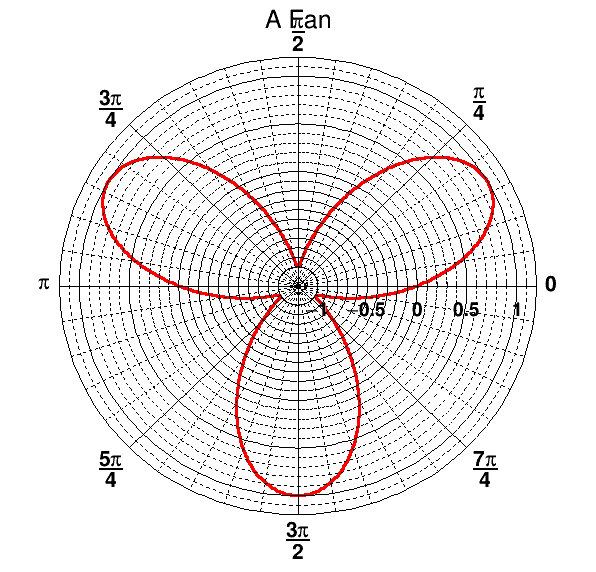

In [4]:
auto canvas_4_2 = new TCanvas("myCanvas","myCanvas",600,600);
Double_t rmin=0.;
Double_t rmax=TMath::Pi()*6.;
const Int_t npoints=1000;
Double_t r[npoints];
Double_t theta[npoints];
for (Int_t ipt = 0; ipt < npoints; ipt++) {
    r[ipt] = ipt*(rmax-rmin)/npoints+rmin;
    theta[ipt] = TMath::Sin(r[ipt]);
}
TGraphPolar grP1 (npoints,r,theta);
grP1.SetTitle("A Fan");
grP1.SetLineWidth(3);
grP1.SetLineColor(2);
grP1.DrawClone("L");
canvas_4_2->Draw();

A new element was added on the canvas declaration, the size of the canvas: it is sometimes optically better to show plots in specific canvas sizes.

## 4.3 2D Graphs


Under specific circumstances, it might be useful to plot some quantities versus two variables, therefore creating a bi-dimensional graph. Of course ROOT can help you in this task, with the [```TGraph2DErrors```](https://root.cern.ch/doc/master/classTGraph2DErrors.html) class. The following macro produces a bi-dimensional graph representing a hypothetical measurement, fits a bi-dimensional function to it and draws it together with its x and y projections. Some points of the code will be explained in detail. This time, the graph is populated with data points using random numbers, introducing a new and very important ingredient, the ROOT ```TRandom3``` random number generator using the [Mersenne Twister algorithm (Matsumoto 1997)](http://www.math.sci.hiroshima-u.ac.jp/~m-mat/MT/emt.html).

Let’s go through the code, step by step to understand what is going on:

* The instance of the random generator. You can then draw out of this instance random numbers distributed according to different probability density functions, like the Uniform one at point 2. See the on-line documentation to appreciate the full power of this ROOT feature.

In [5]:
//#1
TRandom3 my_random_generator;

* You are already familiar with the TF1 class. This is its two-dimensional version. At line 16 two random numbers distributed according to the TF2 formula are drawn with the method TF2::GetRandom2(double& a, double&b).

In [6]:
//#2
TF2 function_4_3("f2","1000*(([0]*sin(x)/x)*([1]*sin(y)/y))+2000",-6,6,-6,6);
function_4_3.SetParameters(1,1);
TGraph2DErrors dte(500);
// Fill the 2D graph
double rnd, x, y, z, ex, ey, ez;
for (Int_t i=0; i<500; i++) {
    function_4_3.GetRandom2(x,y);
    // A random number in [-e,e]
    rnd = my_random_generator.Uniform(-0.3,0.3);
    z = function_4_3.Eval(x,y)*(1+rnd);
    dte.SetPoint(i,x,y,z);
    ex = 0.05*my_random_generator.Uniform();
    ey = 0.05*my_random_generator.Uniform();
    ez = fabs(z*rnd);
    dte.SetPointError(i,ex,ey,ez);
}

* Fitting a 2-dimensional function just works like in the one-dimensional case, i.e. initialisation of parameters and calling of the Fit() method.

In [7]:
//#4
// Fit function to generated data
function_4_3.SetParameters(0.7,1.5);  // set initial values for fit
function_4_3.SetTitle("Fitted 2D function");
dte.Fit(&function_4_3);
// Plot the result
auto canvas_4_3_1 = new TCanvas();
function_4_3.SetLineWidth(1);
function_4_3.SetLineColor(kBlue-5);

 FCN=550.868 FROM HESSE     STATUS=NOT POSDEF     14 CALLS          48 TOTAL
                     EDM=9.72579e-13    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.83686e-01   1.49858e-01   4.34655e-06  -3.65525e-05
   2  p1           1.46504e+00   3.21126e-01   9.31404e-06  -1.28163e-05


* The Surf1 option draws the TF2 objects (but also bi-dimensional histograms) as coloured surfaces with a wire-frame on three-dimensional canvases. 

In [8]:
//#5
TF2   *function_4_3_c = (TF2*)function_4_3.DrawClone("Surf1");

* Retrieve the axis pointer and define the axis titles.

In [9]:
//#6
TAxis *Xaxis = function_4_3_c->GetXaxis();
TAxis *Yaxis = function_4_3_c->GetYaxis();
TAxis *Zaxis = function_4_3_c->GetZaxis();
Xaxis->SetTitle("X Title"); Xaxis->SetTitleOffset(1.5);
Yaxis->SetTitle("Y Title"); Yaxis->SetTitleOffset(1.5);
Zaxis->SetTitle("Z Title"); Zaxis->SetTitleOffset(1.5);

* Draw the cloud of points on top of the coloured surface.

In [10]:
//#7
dte.DrawClone("P0 Same");
// Make the x and y projections

* Here you learn how to create a canvas, partition it in two sub-pads and access them. It is very handy to show multiple plots in the same window or image.

In [11]:
//#8
auto canvas_4_3_2= new TCanvas("ProjCan","The Projections",1000,400);
canvas_4_3_2->Divide(2,1);
canvas_4_3_2->cd(1);
dte.Project("x")->Draw();
canvas_4_3_2->cd(2);
dte.Project("y")->Draw();
   
canvas_4_3_2 ->Draw();

## 4.4 Multiple graphs

The class [```TMultigraph```](https://root.cern.ch/doc/master/classTMultiGraph.html) allows to manipulate a set of graphs as a single entity. It is a collection of TGraph (or derived) objects. When drawn, the X and Y axis ranges are automatically computed such as all the graphs will be visible.

In [12]:
TCanvas *canvas_4_4 = new TCanvas("canvas_4_4","multigraph",700,500);
canvas_4_4->SetGrid();

Here we create the multigraph.

In [13]:
TMultiGraph *multigraph_4_4 = new TMultiGraph();

// create first graph
const Int_t n1 = 10;
Double_t px1[] = {-0.1, 0.05, 0.25, 0.35, 0.5, 0.61,0.7,0.85,0.89,0.95};
Double_t py1[] = {-1,2.9,5.6,7.4,9,9.6,8.7,6.3,4.5,1};
Double_t ex1[] = {.05,.1,.07,.07,.04,.05,.06,.07,.08,.05};
Double_t ey1[] = {.8,.7,.6,.5,.4,.4,.5,.6,.7,.8};
TGraphErrors *error_graph_1 = new TGraphErrors(n1,px1,py1,ex1,ey1);
error_graph_1->SetMarkerColor(kBlue);
error_graph_1->SetMarkerStyle(21);
multigraph_4_4->Add(error_graph_1);

Here we create two graphs with errors and add them in the multigraph.

In [14]:
// create second graph
const Int_t n2 = 10;
Float_t x2[]  = {-0.28, 0.005, 0.19, 0.29, 0.45, 0.56,0.65,0.80,0.90,1.01};
Float_t y2[]  = {2.1,3.86,7,9,10,10.55,9.64,7.26,5.42,2};
Float_t ex2[] = {.04,.12,.08,.06,.05,.04,.07,.06,.08,.04};
Float_t ey2[] = {.6,.8,.7,.4,.3,.3,.4,.5,.6,.7};
TGraphErrors *error_graph_2 = new TGraphErrors(n2,x2,y2,ex2,ey2);
error_graph_1->SetMarkerColor(kRed);
error_graph_1->SetMarkerStyle(20);
multigraph_4_4->Add(error_graph_1);

multigraph_4_4->Draw("apl");

Here we draw the multigraph. The axis limits are computed automatically to make sure all the graphs’ points will be in range.

In [15]:
multigraph_4_4->GetXaxis()->SetTitle("X values");
multigraph_4_4->GetYaxis()->SetTitle("Y values");

gPad->Update();
gPad->Modified();
canvas_4_4->Draw();